# 线性回归
## 3.2 线性回归:从零开始实现
### 只利用NDArray和autograd来实现一个线性回归的训练


In [ ]:
# 导包
# matplotlib 作图,嵌入式显示
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random


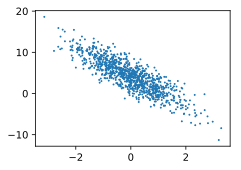

In [12]:
# 生成数据集
## 样本数量1000,特征数2
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
## features:1000*2
features = nd.random.normal(scale=1,shape=(num_examples,num_inputs))
## labels:1000*1
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01,shape=labels.shape)

features[0],labels[0]

def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);


In [15]:
# 读取数据集

## 遍历数据集并不断读取小批量数据样本
 
### 每次返回batch_size(批量大小)个随机样本的特征和标签
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0,num_examples,batch_size):
        j = nd.array(indices[i:min(i + batch_size,num_examples)])
        yield features.take(j),labels.take(j) # take函数根据索引返回对应元素
    
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break




[[ 1.0750668   0.8517695 ]
 [ 1.176486   -0.9196464 ]
 [-0.42795765  0.13593559]
 [ 1.2344649  -1.2585411 ]
 [ 0.44914827 -1.5824921 ]
 [-0.9134421   0.9738733 ]
 [ 1.0879269  -0.2114546 ]
 [ 0.4337812   0.9805841 ]
 [-1.7977642   1.4361873 ]
 [ 0.11903927  0.8262144 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.4404948   9.6829195   2.8911166  10.938608   10.480155   -0.94239694
  7.0945415   1.7291223  -4.2641406   1.6280303 ]
<NDArray 10 @cpu(0)>


In [17]:
# 初始化模型参数

## 将权重初始化成均值为0,标准差为0.02的正态随机数,偏差初始化为0

w = nd.random.normal(scale=0.01,shape=(num_inputs,1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()


In [18]:
# 定义模型

## 线性回归矢量计算表达式的实现.使用dot函数做矩阵乘法
def linreg(X,w,b):
    return nd.dot(X,w) + b


In [19]:
# 定义损失函数

## 使用平方损失函数
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2/2


In [20]:
# 定义优化算法

## 小批量随机梯度下降算法,通过不断迭代模型参数来优化损失函数

def sgd(params,lr,batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size


In [21]:
# 训练模型

## 根据当前读取到的小批量数据样本(特征X,标签y),通过调用反向函数backwrd计算小批量随机梯度,并调用优化算法sgd迭代模型参数
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中,会使用训练数据集中的所有样本一次(假设样本能被批量大小整除)
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l = loss(net(X,w,b),y) # l是有关小批量X和y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w,b],lr,batch_size) # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features,w,b),labels)
    print('epoch %d ,loss %f ' % (epoch + 1 ,train_l.mean().asnumpy()))
    


find_frame: frame not found.
    Looking for thread_id:pid_4579_id_4427642360, frame_id:4692769312
    Current     thread_id:pid_4579_id_4427642360, available frames:
    140634836979960  -  140634835805688  -  140634835803304  -  140634834150472  -  140634834145880
140634833664520  -  140634833796744  -  140634791575176  -  140634830741064  -  140634821319704
140634830735000  -  140634829819576  -  140634829819016  -  4463502776  -  140634791442200
140634834120104  -  140634791496360  -  140634835996904  -  140634791486200  -  140634835974824
140634829808760  -  140634835998056  -  4463164440  -  140634834133768  -  4462975360
140634829806168  -  140634829805544  -  4463146056  -  140634829804968  -  140634830674424
140634794679336  -  4426534080  -  140634790938232  -  140634790936616  -  

    find_frame: frame not found.
    Looking for thread_id:pid_4579_id_4427642360, frame_id:4692769312
    Current     thread_id:pid_4579_id_4427642360, available frames:
    140634836979960  -  1

epoch 1 ,loss 0.032989 
epoch 2 ,loss 0.000117 
epoch 3 ,loss 0.000049 
